# GA（Genetic Algorithms）

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import random
import math

In [33]:

# DNA的长度
DNA_SIZE = 24

# 种群的大小
POP_SIZE = 200

# 交叉概率
CROSSOVER_RATE = 0.8

# 变异概率
MUTATION_RATE = 0.005

# 进化的代数
N_GENERATIONS = 100

# X轴的取值范围
X_BOUND = [-3, 3]

# Y轴的取值范围
Y_BOUND = [-3, 3]


In [34]:
# 定义适应度函数
def F(x, y):
    return 3*(1-x)**2*np.exp(-(x**2)-(y+1)**2)- 10*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2)- 1/3**np.exp(-(x+1)**2 - y**2)


In [35]:

# 计算种群中每个个体的适应度
def get_fitness(pop):
    # 将二进制DNA转换为x和y值
    x, y = translateDNA(pop)
    # 计算适应度
    pred = F(x, y)
    #减去最小的适应度是为了防止适应度出现负数，通过这一步fitness的范围为[0, np.max(pred)-np.min(pred)],最后在加上一个很小的数防止出现为0的适应度
    return (pred - np.min(pred)) + 1e-3 

# 将二进制DNA表示转换为相应的x和y值
def translateDNA(pop):
    # 奇数列表示X
    x_pop = pop[:,1::2]
    # 偶数列表示y
    y_pop = pop[:,::2] 
    # 将二进制DNA转换为十进制，并缩放到[X_BOUND[0], X_BOUND[1]]范围内
    x = x_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2 ** DNA_SIZE - 1) * (X_BOUND[1] - X_BOUND[0]) + X_BOUND[0]
    # 将二进制DNA转换为十进制，并缩放到[Y_BOUND[0], Y_BOUND[1]]范围内
    y = y_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2 ** DNA_SIZE - 1) * (Y_BOUND[1] - Y_BOUND[0]) + Y_BOUND[0]
    return x, y

# 对种群进行交叉变异
def crossover_and_mutation(pop, CROSSOVER_RATE=0.8):
    # 新种群
    new_pop = []
    # 遍历种群中的每一个个体，将该个体作为父亲
    for father in pop:
        # 孩子先得到父亲的全部基因
        child = father
        # 如果随机数小于交叉率
        if np.random.rand() < CROSSOVER_RATE:
            # 随机选择一个母亲
            mother = pop[np.random.randint(POP_SIZE)]
            # 随机选择交叉点
            cross_points = np.random.randint(low=0, high=DNA_SIZE * 2)
            # 孩子的某些基因来自母亲
            child[cross_points:] = mother[cross_points:]
        # 对孩子进行突变
        mutation(child)
        # 将孩子添加到新种群中
        new_pop.append(child)
    return new_pop

# 对个体进行突变
def mutation(child, MUTATION_RATE=0.003):
    # 如果随机数小于突变率
    if np.random.rand() < MUTATION_RATE:
        # 随机选择一个突变点
        mutate_point = np.random.randint(0, DNA_SIZE)
        # 在突变点上将基因值取反
        child[mutate_point] = child[mutate_point] ^ 1

# 根据适应度进行选择
def select(pop, fitness):
    # 根据适应度的概率选择个体，可以选择重复的个体
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True, p=(fitness) / (fitness.sum()))
    # 返回选择后的种群
    return pop[idx]

In [36]:

# 绘制3D曲面图
def plot_3d(ax):
    # 在X_BOUND范围内生成100个等间距的数
    X = np.linspace(*X_BOUND, 100)
    # 在Y_BOUND范围内生成100个等间距的数
    Y = np.linspace(*Y_BOUND, 100)
    # 生成网格点坐标矩阵
    X, Y = np.meshgrid(X, Y)
    # 计算每个点的Z值
    Z = F(X, Y)
    # 绘制3D曲面图
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
    # 设置x轴标签
    ax.set_xlabel('x')
    # 设置y轴标签
    ax.set_ylabel('y')
    # 设置z轴标签
    ax.set_zlabel('z')
    # 暂停3秒
    plt.pause(3)
    # 显示图像
    plt.show()

# 打印种群信息
def print_info(pop):
    # 计算种群的适应度
    fitness = get_fitness(pop)
    # 找到最大适应度的索引
    max_fitness_index = np.argmax(fitness)
    # 打印最大适应度
    print("max_fitness:", fitness[max_fitness_index])
    # 将二进制DNA转换为x和y值
    x, y = translateDNA(pop)
    # 打印最优的基因型
    print("最优的基因型：", pop[max_fitness_index])
    # 打印最优基因型对应的(x, y)
    print("(x, y):", (x[max_fitness_index], y[max_fitness_index]))
    # 打印最优基因型的适应度值
    print(F(x[max_fitness_index], y[max_fitness_index]))

max_fitness: 0.0017901798126619397
最优的基因型： [1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 0 1 0 1 1]
(x, y): (0.00043541195603680194, 1.5772618399418494)
7.148324959889946


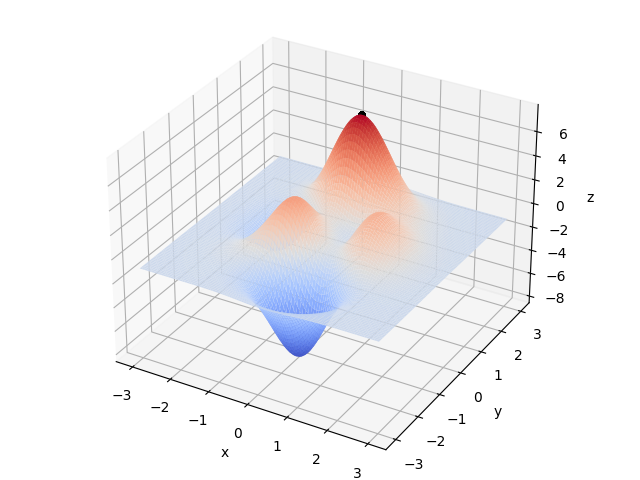

In [37]:


# 创建一个图形
fig = plt.figure()
# 添加一个3D坐标轴
ax = fig.add_axes(Axes3D(fig))
# 切换到交互模式，用于连续绘图
plt.ion()  
# # 绘制初始的3D曲面
# plot_3d(ax)  

# 初始化种群，种群中的每个个体由DNA_SIZE*2个基因组成，每个基因可以是0或1
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE * 2))

# # 进化循环
# for _ in range(N_GENERATIONS):
#     # 将二进制DNA转换为x和y值
#     x, y = translateDNA(pop)
#     # 如果sca在局部变量中，移除上一次的散点图
#     if 'sca' in locals():
#         sca.remove()
#     # 绘制新的散点图
#     sca = ax.scatter(x, y, F(x, y), c='black', marker='o')
#     # 显示图像
#     plt.show()
#     # 暂停0.1秒
#     plt.pause(0.1)
#     # 对种群进行交叉和突变
#     pop = np.array(crossover_and_mutation(pop, CROSSOVER_RATE))
#     # 计算种群的适应度
#     fitness = get_fitness(pop)
#     # 根据适应度进行选择
#     pop = select(pop, fitness)
# 进化循环
for _ in range(N_GENERATIONS):
    # 将二进制DNA转换为x和y值
    x, y = translateDNA(pop)
    # 对种群进行交叉和突变
    pop = np.array(crossover_and_mutation(pop, CROSSOVER_RATE))
    # 计算种群的适应度
    fitness = get_fitness(pop)
    # 根据适应度进行选择
    pop = select(pop, fitness)

# 绘制新的散点图
sca = ax.scatter(x, y, F(x, y), c='black', marker='o')

# 打印最终的种群信息
print_info(pop)

# 关闭交互模式
plt.ioff()  
# 绘制最终的3D曲面
plot_3d(ax)  


轮数：100
最佳个体：[ 8.15674705e-10 -2.12700390e-09]
目标函数值：6.443272138056955e-09


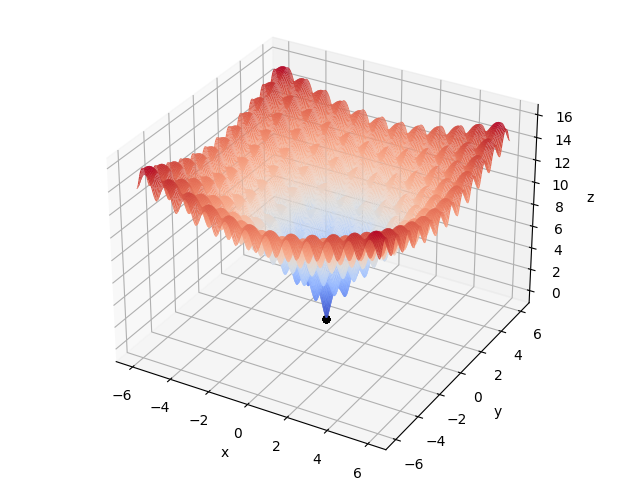

In [12]:

# X轴的取值范围
X_BOUND2 = [-513, 513]

# Y轴的取值范围
Y_BOUND2 = [-513, 513]



# 绘制3D曲面图
def plot_3d2(ax):
    # 在X_BOUND范围内生成200个等间距的数
    X = np.linspace(*X_BOUND2, 200)
    # 在Y_BOUND范围内生成200个等间距的数
    Y = np.linspace(*Y_BOUND2, 200)
    # 生成网格点坐标矩阵
    X, Y = np.meshgrid(X, Y)
    # 计算每个点的Z值
    Z = f([X, Y])
    # 绘制3D曲面图
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
    # 设置x轴标签
    ax.set_xlabel('x')
    # 设置y轴标签
    ax.set_ylabel('y')
    # 设置z轴标签
    ax.set_zlabel('z')
    # 暂停3秒
    plt.pause(3)
    # 显示图像
    # plt.show()
    
# X轴的取值范围
X_BOUND4 = [-6, 6]

# Y轴的取值范围
Y_BOUND4 = [-6, 6]

# 绘制3D曲面图
def plot_3d4(ax):
    # 在X_BOUND范围内生成200个等间距的数
    X = np.linspace(*X_BOUND4, 200)
    # 在Y_BOUND范围内生成200个等间距的数
    Y = np.linspace(*Y_BOUND4, 200)
    # 生成网格点坐标矩阵
    X, Y = np.meshgrid(X, Y)
    # 计算每个点的Z值
    Z = f2([X, Y])
    # 绘制3D曲面图
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
    # 设置x轴标签
    ax.set_xlabel('x')
    # 设置y轴标签
    ax.set_ylabel('y')
    # 设置z轴标签
    ax.set_zlabel('z')
    # 暂停3秒
    plt.pause(3)
    # 显示图像
    # plt.show()
class Population:
    def __init__(self, min_range, max_range, dim, factor, rounds, size, object_func, CR=0.75):
        self.min_range = min_range  # 种群中个体的最小值
        self.max_range = max_range  # 种群中个体的最大值
        self.dimension = dim  # 种群的维度
        self.factor = factor  # 缩放因子
        self.rounds = rounds  # 进化的轮数
        self.size = size  # 种群的大小
        self.cur_round = 1  # 当前的轮数
        self.CR = CR  # 交叉概率
        self.get_object_function_value = object_func  # 目标函数
        # 初始化种群
        self.individuality = [np.array([random.uniform(self.min_range, self.max_range) for s in range(self.dimension)]) for tmp in range(size)]
        self.object_function_values = [self.get_object_function_value(v) for v in self.individuality]  # 计算种群中每个个体的目标函数值
        self.mutant = None  # 变异体
 
    def mutate(self):  # 变异操作
        self.mutant = []
        for i in range(self.size):
            r0, r1, r2 = 0, 0, 0
            while r0 == r1 or r1 == r2 or r0 == r2 or r0 == i:  # 随机选择三个不同的个体
                r0 = random.randint(0, self.size-1)
                r1 = random.randint(0, self.size-1)
                r2 = random.randint(0, self.size-1)
            tmp = self.individuality[r0] + (self.individuality[r1] - self.individuality[r2]) * self.factor  # 变异操作
            for t in range(self.dimension):
                if tmp[t] > self.max_range or tmp[t] < self.min_range:  # 如果变异后的值超出范围，则重新随机生成
                    tmp[t] = random.uniform(self.min_range, self.max_range)
            self.mutant.append(tmp)  # 添加到变异体列表中
 
    def crossover_and_select(self):  # 交叉和选择操作
        for i in range(self.size):
            Jrand = random.randint(0, self.dimension)
            for j in range(self.dimension):
                if random.random() > self.CR and j != Jrand:  # 交叉操作
                    self.mutant[i][j] = self.individuality[i][j]
                tmp = self.get_object_function_value(self.mutant[i])  # 计算变异体的目标函数值
                if tmp < self.object_function_values[i]:  # 如果变异体的目标函数值小于原个体的目标函数值，则替换
                    self.individuality[i] = self.mutant[i]
                    self.object_function_values[i] = tmp
 
    def print_best(self):  # 打印最优个体
        m = min(self.object_function_values)  # 找到最小的目标函数值
        i = self.object_function_values.index(m)  # 找到最小目标函数值对应的个体
        print("轮数：" + str(self.cur_round))
        print("最佳个体：" + str(self.individuality[i]))
        print("目标函数值：" + str(m))
 
    # def evolution(self, ax):  # 进化操作，添加一个参数ax，用于绘图
    #     global sca  # 声明sca为全局变量，以便在函数外部访问
    #     while self.cur_round < self.rounds:  # 当前轮数小于总轮数时，继续进化
    #         self.mutate()  # 变异
    #         self.crossover_and_select()  # 交叉和选择
    #         self.cur_round = self.cur_round + 1  # 轮数加1
    #         if 'sca' in globals() and sca in ax.collections:  # 如果sca在全局变量中，并且sca在ax的collections中，移除上一次的散点图
    #             sca.remove()
    #         # 绘制新的散点图，表示种群的当前状态
    #         x = [ind[0] for ind in self.individuality]
    #         y = [ind[1] for ind in self.individuality]
    #         z = [self.get_object_function_value(ind) for ind in self.individuality]
    #         sca = ax.scatter(x, y, z, c='black', marker='o')
    #         plt.show()
    #         plt.pause(0.3)  # 暂停0.3秒
    #     self.print_best()  # 打印最优个体
    def evolution(self, ax):  # 进化操作，添加一个参数ax，用于绘图
        while self.cur_round < self.rounds:  # 当前轮数小于总轮数时，继续进化
            self.mutate()  # 变异
            self.crossover_and_select()  # 交叉和选择
            self.cur_round = self.cur_round + 1  # 轮数加1
        self.print_best()  # 打印最优个体
        # 移出循环后，绘制最后的散点图
        x = [ind[0] for ind in self.individuality]
        y = [ind[1] for ind in self.individuality]
        z = [self.get_object_function_value(ind) for ind in self.individuality]
        ax.scatter(x, y, z, c='black', marker='o')
        # plt.show()
def f(v):
    return -(v[1]+47)*np.sin(np.sqrt(np.abs(v[1]+(v[0]/2)+47))) - v[0] * np.sin(np.sqrt(np.abs(v[0]-v[1]-47)))
def f2(v):
    term1 = -20 * np.exp(-0.2 * np.sqrt(0.5 * (v[0]**2 + v[1]**2)))
    term2 = np.exp(0.5 * (np.cos(2*np.pi*v[0]) + np.cos(2*np.pi*v[1])))
    return 20 + np.e + term1 - term2
# 创建一个图形
fig = plt.figure()
# 添加一个3D坐标轴
ax = fig.add_axes(Axes3D(fig))
# 切换到交互模式，用于连续绘图
plt.ion()  
# plot_3d2(ax)  # 绘制3D曲面图

# p = Population(min_range=-513, max_range=513, dim=2, factor=0.8, rounds=100, size=100, object_func=f)
p = Population(min_range=-5.12, max_range=5.12, dim=2, factor=0.8, rounds=100, size=100, object_func=f2)
p.evolution(ax)  # 传入ax作为参数

# 关闭交互模式
plt.ioff()  
# 显示最终的3D图形
# plot_3d2(ax)  
plot_3d4(ax) 

最优解： [-513.  513.]
目标函数值： 1053.8102135243153


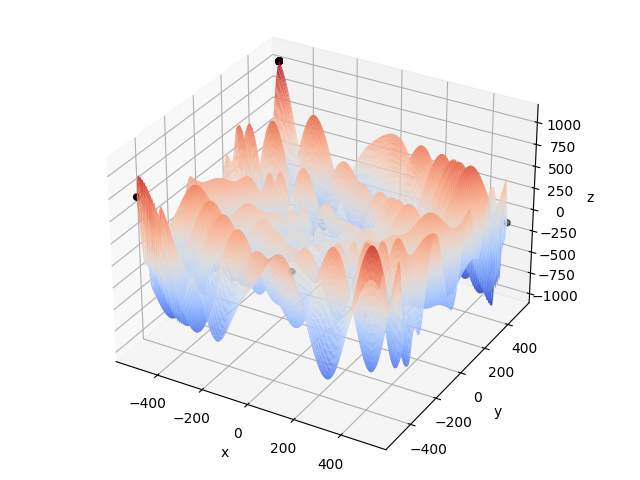

In [13]:
# X轴的取值范围
X_BOUND3 = [-513, 513]

# Y轴的取值范围
Y_BOUND3 = [-513, 513]
# 绘制3D曲面图
def plot_3d3(ax):
    # 在X_BOUND范围内生成200个等间距的数
    X = np.linspace(*X_BOUND3, 200)
    # 在Y_BOUND范围内生成200个等间距的数
    Y = np.linspace(*Y_BOUND3, 200)
    # 生成网格点坐标矩阵
    X, Y = np.meshgrid(X, Y)
    # 计算每个点的Z值
    Z = f([X, Y])
    # 绘制3D曲面图
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
    # 设置x轴标签
    ax.set_xlabel('x')
    # 设置y轴标签
    ax.set_ylabel('y')
    # 设置z轴标签
    ax.set_zlabel('z')
    # 暂停3秒
    plt.pause(3)
    # # 显示图像
    # plt.show()

class Particle:
    def __init__(self, bounds):
        self.position = np.array([np.random.uniform(low, high) for low, high in bounds])
        self.velocity = np.array([np.random.uniform(-1, 1) for _ in range(len(bounds))])
        self.best_position = self.position.copy()
        self.best_fitness = -np.inf

    def update_velocity(self, global_best, w=0.7, c1=1.4, c2=1.4):
        r1 = np.random.uniform(0, 1, size=len(self.velocity))
        r2 = np.random.uniform(0, 1, size=len(self.velocity))
        cognitive_velocity = c1 * r1 * (self.best_position - self.position)
        social_velocity = c2 * r2 * (global_best - self.position)
        self.velocity = w * self.velocity + cognitive_velocity + social_velocity

    def update_position(self, bounds):
        self.position += self.velocity
        self.position = np.maximum(self.position, np.array(bounds)[:, 0])
        self.position = np.minimum(self.position, np.array(bounds)[:, 1])

class Swarm:
    def __init__(self, func, particle_count, bounds):
        self.particles = [Particle(bounds) for _ in range(particle_count)]
        self.global_best = None
        self.func = func

    def optimize(self, iterations, ax):
        for _ in range(iterations):
            for particle in self.particles:
                fitness = self.func(particle.position)
                if fitness > particle.best_fitness:
                    particle.best_fitness = fitness
                    particle.best_position = particle.position.copy()
                if self.global_best is None or fitness > self.func(self.global_best):
                    self.global_best = particle.position.copy()
            for particle in self.particles:
                particle.update_velocity(self.global_best)
                particle.update_position(bounds)
                global sca  # 声明sca为全局变量，以便在函数外部访问

        # 绘制新的散点图，表示种群的当前状态
        x = [particle.position[0] for particle in self.particles]
        y = [particle.position[1] for particle in self.particles]
        z = [self.func(particle.position) for particle in self.particles]
        sca = ax.scatter(x, y, z, c='black', marker='o')

        return self.global_best

def f(v):
    return -(v[1]+47)*np.sin(np.sqrt(np.abs(v[1]+(v[0]/2)+47))) - v[0] * np.sin(np.sqrt(np.abs(v[0]-v[1]-47)))

# 创建一个图形
fig = plt.figure()
# 添加一个3D坐标轴
ax = fig.add_axes(Axes3D(fig))
# 切换到交互模式，用于连续绘图
plt.ion()  

bounds = [(-513, 513), (-513, 513)]
swarm = Swarm(f, particle_count=100, bounds=bounds)  # 传入ax作为参数
result = swarm.optimize(iterations=100, ax=ax)  # 传入ax作为参数
print("最优解：", result)
print("目标函数值：", f(result))

# 关闭交互模式
plt.ioff()  
# 显示最终的3D图形
plot_3d3(ax)  # 绘制3D曲面图

def f2(v):
    term1 = -20 * np.exp(-0.2 * np.sqrt(0.5 * (v[0]**2 + v[1]**2)))
    term2 = np.exp(0.5 * (np.cos(2*np.pi*v[0]) + np.cos(2*np.pi*v[1])))
    return 20 + np.e - term1 - term2